In [1]:
# import required librarires
import pandas as pd
import numpy as np

In [3]:
# read data one by one
central=pd.read_csv('Central London.csv',low_memory=False)
inner=pd.read_csv('Inner London.csv',low_memory=False)
outer=pd.read_csv('Outer London.csv',low_memory=False)
sites=pd.read_excel("Biking sites.xlsx")

In [4]:
# function for cleaning NA values 
def cleanNa(df,file):
    print("Na in "+file+" are \n"+str(df.isna().sum())) # sum of all NA
    df.dropna(axis=1,how="all",inplace=True) # remove na from entire columns
    df.dropna(axis=0,how="all",inplace=True) # remove na from entire rows
    df.dropna(inplace=True) # remove rows with na cells
    return df

# function for removing duplicates   
def dropDupliactes(df,file):
    dup=df.groupby(df.columns.tolist(),as_index=False).size() # group by to count duplicates
    print("Duplicates in "+file+" are \n"+str(df.isna().sum())) 
    df=df.drop_duplicates() # drop all duplicate rows
    return df

# function for removing empty Date cells
def dropEmptySurveyDateRows(df):
    df=df[df['Survey date'].map(lambda x: len(x.split(', '))==2)] # removing anaomlies from Survey Date
    return df

In [5]:
#  remove NA
central=cleanNa(central,"central")
inner=cleanNa(inner,"inner")
outer=cleanNa(outer,"outer")
sites=cleanNa(sites,"sites")

# remove duplicates
central=dropDupliactes(central,"central")
inner=dropDupliactes(inner,"inner")
outer=dropDupliactes(outer,"outer")
sites=dropDupliactes(sites,"sites")

# remove Date anomlies
central=dropEmptySurveyDateRows(central)
inner=dropEmptySurveyDateRows(inner)
outer=dropEmptySurveyDateRows(outer)

Na in central are 
Survey wave (calendar quarter)     290203
Equivalent financial quarter       290203
Site ID                            290203
Location                           290203
Survey date                        300359
Weather                            302037
Time                               290203
Period                             290203
Direction                          290203
Start hour                         290203
Start minute                       290203
Number of private cycles           290267
Number of cycle hire bikes         290267
Total cycles                       290203
Unnamed: 14                       1048366
Unnamed: 15                       1048366
Unnamed: 16                       1048366
dtype: int64
Na in inner are 
Survey wave (year)            91392
Site ID                       91392
Location                      91392
Survey date                   94144
Weather                       96066
Time                          91398
Period               

In [6]:
# test for null values
np.where(pd.isnull(outer))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
# test for empty '' cells
np.where(outer.applymap(lambda x: x == ''))

In [11]:
# change date (object) column to datetime
outer['Date']=outer['Survey date'].map(lambda x: pd.to_datetime(x.split(',')[1]))

<AxesSubplot:xlabel='Date'>

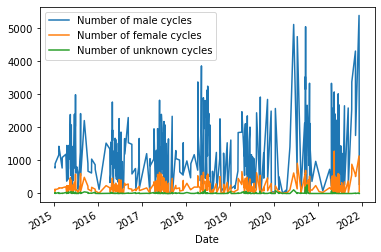

In [12]:
# groupby date to take sum and visualize
outer.groupby(by="Date").sum()[['Number of male cycles',
                                'Number of female cycles',
                                'Number of unknown cycles']].plot()

<AxesSubplot:xlabel='Survey wave (year)'>

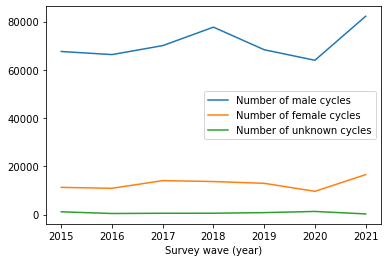

In [13]:
outer.groupby(by="Survey wave (year)").sum()[['Number of male cycles',
                                              'Number of female cycles',
                                              'Number of unknown cycles']].plot()